In [1]:
import json
import pandas as pd
import numpy as np
import os
import re

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
pd.options.display.max_colwidth = 300

In [4]:
file_dir = os.path.join('data', 'wikipedia-movies.json')

In [5]:
file_dir

'data\\wikipedia-movies.json'

In [6]:
with open(file_dir, mode='r') as file:
    wiki_movies_raw = json.load(file)

In [7]:
len(wiki_movies_raw)

7311

In [8]:
type(wiki_movies_raw)

list

In [9]:
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [10]:
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [11]:
movies_path = os.path.join('data', 'movies_metadata.csv')

In [12]:
kaggle_metadata = pd.read_csv(movies_path, low_memory=False)

In [13]:
ratings_path = os.path.join('data', 'ratings.csv')

In [14]:
ratings = pd.read_csv(ratings_path)

In [15]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all ...",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in ...",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg', 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'}",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the 

In [16]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [17]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
41670,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,115909,tt0089752,en,Otra vuelta de tuerca,"Spanish version of Henry James' classic tale ""Turn of the Screw"".",0.149945,/vUS4F5UovhbRVRRZ1izLqZtbYFG.jpg,"[{'name': 'Etb (Euskal Telebista)', 'id': 7343}, {'name': 'Gaurko Filmeak', 'id': 37536}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",1985-10-10,0.0,119.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Turn of the Screw,False,6.7,3.0
32627,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,113638,tt0023990,en,Eskimo,The happy life of an Eskimo is disastrously changed when he mingles with an unscrupulous white trader.,0.43699,/nUZe68Jt2LrniXd0NHIlrZdYjSq.jpg,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1933-11-14,0.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Eskimo,False,0.0,0.0
29602,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://girlrising.com/,173205,tt2444946,en,Girl Rising,Nine filmmakers each profile a young girl from a different part of the world to weave a global tapestry of youth in the 21st century.,3.273977,/udWapqoKhGUF4xBaKjGQ6YmhzVe.jpg,"[{'name': 'The Documentary Group', 'id': 14078}, {'name': 'Vulcan Productions', 'id': 73067}]","[{'iso_3166_1': 'IN', 'name': 'India'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",2013-03-07,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One Girl with Courage is a Revolution,Girl Rising,False,7.1,17.0
45276,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]",NaN,104308,tt0095728,it,Il nido del ragno,"A young professor travels to Budapest to locate a lost colleague. Once there, he gets tangled up in a supernatural mystery.",0.018017,/aYVzvSiiBFhnFZ5OByChSMp6tgm.jpg,"[{'name': 'Reteitalia', 'id': 1242}, {'name': 'Splendida', 'id': 69093}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1988-08-25,0.0,86.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,The Spider Labyrinth,False,7.6,7.0
8073,False,NaN,7500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 53, 'name': 'Thriller'}]",NaN,2577,tt0345061,en,Code 46,"A futuristic 'Brief Encounter', a love story in which the romance is doomed by genetic incompatibility.",6.101401,/lOEo7iG0FV6mxpvl8IQoSvsGSC3.jpg,"[{'name': 'BBC Films', 'id': 288}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2003-09-02,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How do you solve a crime when the last thing you want to know is the truth?,Code 46,False,6.2,116.0


## 8.3.3 Investigate Wikipedia Data

In [18]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [19]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,Narrated by,Music by,Cinematography,Edited by,Productioncompany,Distributed by,Release date,Running time,Country,Language,Budget,Box office,Written by,Genre,Theme music composer,Country of origin,Original language(s),Producer(s),Editor(s),Production company(s),Original network,Original release,Productioncompanies,Executive producer(s),Production location(s),Distributor,Picture format,Audio format,Voices of,Followed by,Composer(s),Created by,Also known as,Opening theme,No. of episodes,Preceded by,Author,Publisher,Publication date,Media type,Pages,ISBN,OCLC,LC Class,Cover artist,Series,Set in,Adaptation by,Suggested by,Biographical data,Born,Died,Resting place,Occupation,Years active,Spouse(s),Children,Parent(s),Genres,Instruments,Labels,Website,Traditional,Mandarin,Type,Industry,Fate,Founded,Founder,Headquarters,Parent,Released,Recorded,Venue,Length,Label,Director,Producer,Area,Coordinates,Status,Opening date,Closing date,Replaced,Replaced by,Name,Attraction type,Music,Duration,Simplified Chinese,Traditional Chinese,Hanyu Pinyin,Literal meaning,Transcriptions,Bopomofo,Gwoyeu Romatzyh,Wade–Giles,IPA,Yale Romanization,Jyutping,Hokkien POJ,Animation by,Color process,Engine(s),Genre(s),Actor control,Production company,Release(s),Format(s),Simplified,Characters,Date premiered,Place premiered,Setting,Original language,Subject,Published,Dewey Decimal,Text,Illustrator,Original title,Published in English,French,Developed by,Ending theme,No. of seasons,Nationality,Portrayed by,Alias,Species,Gender,Family,Alma mater,Camera setup,Novel(s),Comics,Film(s),Screen story by,Hangul,Revised Romanization,McCune–Reischauer,Developer(s),Publisher(s),Designer(s),Programmer(s),Artist(s),Writer(s),Engine,Platform(s),Release,Mode(s),Original work,Television series,Japanese,Hepburn,Literally,Cantonese,Full name,Height,Seasons,Chinese,Other names,Relatives,Yiddish,Formerly,Key people,Total assets,Owner,Number of employees,Divisions,Subsidiaries,Arabic,Romanized,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Presley, Lauren Holly, Morris Day, Robert Englund, Ed O'Neill]","Andrew ""Dice"" Clay","[Cliff Eidelman, Yello]",Oliver Wood,Michael Tronick,Silver Pictures,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_Sweet",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thompson]","[Jason Patric, Rachel Ward, Bruce Dern, George Dickerson]",NaN,Maurice Jarre,Mark Plummer,Howard E. Smith,Avenue Pictures,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film Market), August 24, 1990, (, 1990-08-24, ), (United States)]",114 minutes,United States,English,$6 million,$2.7 millio

In [20]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

>**list comprehensions**

    [expression for element in source_list]
    [expression for element in source_list if filter_expression]

In [21]:
len(wiki_movies_raw)

7311

In [22]:
wiki_movies = [movie for movie in wiki_movies_raw if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie]

In [23]:
len(wiki_movies)

7080

In [24]:
wiki_movies_upd_df = pd.DataFrame(wiki_movies)

In [25]:
len(wiki_movies_upd_df.columns)

78

In [26]:
wiki_movies_upd_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Camera setup'

In [27]:
wiki_movies = [movie for movie in wiki_movies_raw if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie and 'No. of episodes' not in movie]

In [28]:
len(wiki_movies)

7076

In [29]:
wiki_movies_upd_df_2 = pd.DataFrame(wiki_movies)

In [30]:
len(wiki_movies_upd_df_2.columns)

75

## 8.3.5 Function to clean data Part 1

In [31]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,Narrated by,Music by,Cinematography,Edited by,Productioncompany,Distributed by,Release date,Running time,Country,Language,Budget,Box office,Written by,Genre,Theme music composer,Country of origin,Original language(s),Producer(s),Editor(s),Production company(s),Original network,Original release,Productioncompanies,Executive producer(s),Production location(s),Distributor,Picture format,Audio format,Voices of,Followed by,Composer(s),Created by,Also known as,Opening theme,No. of episodes,Preceded by,Author,Publisher,Publication date,Media type,Pages,ISBN,OCLC,LC Class,Cover artist,Series,Set in,Adaptation by,Suggested by,Biographical data,Born,Died,Resting place,Occupation,Years active,Spouse(s),Children,Parent(s),Genres,Instruments,Labels,Website,Traditional,Mandarin,Type,Industry,Fate,Founded,Founder,Headquarters,Parent,Released,Recorded,Venue,Length,Label,Director,Producer,Area,Coordinates,Status,Opening date,Closing date,Replaced,Replaced by,Name,Attraction type,Music,Duration,Simplified Chinese,Traditional Chinese,Hanyu Pinyin,Literal meaning,Transcriptions,Bopomofo,Gwoyeu Romatzyh,Wade–Giles,IPA,Yale Romanization,Jyutping,Hokkien POJ,Animation by,Color process,Engine(s),Genre(s),Actor control,Production company,Release(s),Format(s),Simplified,Characters,Date premiered,Place premiered,Setting,Original language,Subject,Published,Dewey Decimal,Text,Illustrator,Original title,Published in English,French,Developed by,Ending theme,No. of seasons,Nationality,Portrayed by,Alias,Species,Gender,Family,Alma mater,Camera setup,Novel(s),Comics,Film(s),Screen story by,Hangul,Revised Romanization,McCune–Reischauer,Developer(s),Publisher(s),Designer(s),Programmer(s),Artist(s),Writer(s),Engine,Platform(s),Release,Mode(s),Original work,Television series,Japanese,Hepburn,Literally,Cantonese,Full name,Height,Seasons,Chinese,Other names,Relatives,Yiddish,Formerly,Key people,Total assets,Owner,Number of employees,Divisions,Subsidiaries,Arabic,Romanized,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, Antoun Sehnaoui, Nadia Turincev]",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",NaN,Éric Neveux,Tommaso Fiorilli,Dominique Marcombe,"[Ezekiel Films, Tessalit Productions, Rouge International]","[Diaphana Films, (France), Italia Film, (Lebanon]","[31 August 2017, (, 2017-08-31, ), (, Venice, ), 14 September 2017, (, 2017-09-14, ), (Lebanon), 31 January 2018, (, 2018-01-31, ), (France)]",112 minutes,"[France, Lebanon]",Lebanese Arabic,NaN,$1.6 million,"[Ziad Doueiri, Joelle Touma]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case No. 23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7293,https://en.wikipedia.org/wiki/Capernaum_(film),2018.0,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserwany]","[Georges Khabbaz, Nadine Labaki, Michelle Keserwany, Jihad Hojaily, Khaled Mouzanar]",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife Bankole, Kawthar Al Haddad, Fadi Kamel Youssef, Nour el Husseini, Alaa Chouchnieh, Cedra Izam, Nadine Labaki, Joseph Jimbazian, Farah Hasno

In [32]:
# visit movie wiki page
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [33]:
sorted(wiki_movies_upd_df_2.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [34]:
# Non-english movies hold alternate title data
print(wiki_movies_df[wiki_movies_df['Polish'].notnull()]['url'])

7305    https://en.wikipedia.org/wiki/Cold_War_(2018_film)
Name: url, dtype: object


### Handle the Alternative Titles

In [35]:
def clean_movie(movie):
    """
    Store alternate titles into new dictionary
    """
    movie = dict(movie) #create a non-destructive copy
    
    # create empty dictionary to hold alternate titles
    alt_titles = {}
    
    alt_title_keys = ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']
    
    for key in alt_title_keys:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    return movie

In [36]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [37]:
wiki_movies_df_3 = pd.DataFrame(clean_movies)
sorted(wiki_movies_df_3.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## 8.3.6 Function to Clean data Part 2

> Look at columns with slightly different names

In [38]:
# Examine 'Adaptation by' column
wiki_movies_df_3[wiki_movies_df_3['Adaptation by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,Narrated by,Music by,Cinematography,Edited by,Productioncompany,Distributed by,Release date,Running time,Country,Language,Budget,Box office,Written by,Genre,Theme music composer,Country of origin,Original language(s),Producer(s),Editor(s),Production company(s),Original network,Original release,Productioncompanies,Executive producer(s),Production location(s),Distributor,Picture format,Audio format,Voices of,Followed by,Composer(s),Created by,Preceded by,Adaptation by,Suggested by,alt_titles,Released,Recorded,Venue,Length,Label,Director,Producer,Animation by,Color process,Screen story by
534,https://en.wikipedia.org/wiki/The_Last_of_the_Mohicans_(1992_film),1992,https://www.imdb.com/title/tt0104691/,The Last of the Mohicans,Michael Mann,"[Michael Mann, Hunt Lowry]","[Michael Mann, Christopher Crowe]",NaN,"[The Last of the Mohicans, by, James Fenimore Cooper, The Last of the Mohicans, by, Philip Dunne]","[Daniel Day-Lewis, Madeleine Stowe, Jodhi May]",NaN,"[Trevor Jones, Randy Edelman]",Dante Spinotti,"[Dov Hoenig, Arthur Schmidt]",Morgan Creek Productions,"[20th Century Fox, (USA), Warner Bros., (International)]","[August 26, 1992, (, 1992-08-26, ), (France), September 25, 1992, (, 1992-09-25, ), (United States)]",112 minutes,United States,"[English, French, Mohawk, Huron]",$40 million,"[$75.5 million, (North America), [2]]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[John L. Balderston, Paul Perez, Daniel Moore]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,https://en.wikipedia.org/wiki/The_Nightmare_Before_Christmas,1993,https://www.imdb.com/title/tt0107688/,The Nightmare Before Christmas,Henry Selick,"[Tim Burton, Denise Di Novi]",Caroline Thompson,NaN,"[Story and characters, by Tim Burton]","[Danny Elfman, Chris Sarandon, Catherine O'Hara, William Hickey, Glenn Shadix, Paul Reubens, Ken Page, Ed Ivory]",NaN,Danny Elfman,Pete Kozachik,Stan Webb,NaN,Buena Vista Pictures Distribution,"[October 29, 1993, (, 1993-10-29, )]",76 minutes,United States,English,$18 million,$76.2 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Touchstone Pictures, 1, Skellington Productions, Walt Disney Pictures, (reissue)]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michael McDowell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
wiki_movies_df_3.loc[791].sort_index()

Adaptation by                                                                                                             Michael McDowell
Animation by                                                                                                                           NaN
Audio format                                                                                                                           NaN
Based on                                                                                             [Story and characters, by Tim Burton]
Box office                                                                                                                   $76.2 million
Budget                                                                                                                         $18 million
Cinematography                                                                                                               Pete Kozachik
Color process              

In [40]:
def clean_movie_2(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
            
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [41]:
clean_movies = [clean_movie_2(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## 8.3.7 Remove Duplicate Rows

### Regular Expressions

`(tt\d{7})` — The parentheses marks say to look for one group of text.

`(tt\d{7})` — The "tt" in the string simply says to match two lowercase Ts.

`(tt\d{7})` — The "\d" says to match a numerical digit.

`(tt\d{7})` — The "{7}" says to match the last thing (numerical digits) exactly seven times.

In [42]:
# We put an `r` before quotes to treat our regular expression characters as a raw string of text
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

In [43]:
print(len(wiki_movies_df))

7076


In [44]:
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,Country,Language,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),Genre,Original language(s),Original network,Executive producer(s),Production location(s),Picture format,Audio format,Voices of,Followed by,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Presley, Lauren Holly, Morris Day, Robert Englund, Ed O'Neill]","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_Sweet",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thompson]","[Jason Patric, Rachel Ward, Bruce Dern, George Dickerson]",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film Market), August 24, 1990, (, 1990-08-24, ), (United States)]",114 minutes,United States,English,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, David Marshall Grant, Lane Smith]",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia Farrow, William Hurt, Keye Luke, Joe Mantegna, Bernadette Peters]",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,English,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,US,English,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


### Remove Mostly Null Columns

In [45]:
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [46]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

In [47]:
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [48]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,Language,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Presley, Lauren Holly, Morris Day, Robert Englund, Ed O'Neill]",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_Sweet",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thompson]","[Jason Patric, Rachel Ward, Bruce Dern, George Dickerson]",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film Market), August 24, 1990, (, 1990-08-24, ), (United States)]",114 minutes,United States,English,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, David Marshall Grant, Lane Smith]",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia Farrow, William Hurt, Keye Luke, Joe Mantegna, Bernadette Peters]",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,English,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,English,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


## 8.3.8 Make a Plan to Convert and Parse the Data

In [49]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [50]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    7033 non-null   object
 1   year                   7033 non-null   int64 
 2   imdb_link              7033 non-null   object
 3   title                  7032 non-null   object
 4   Based on               2181 non-null   object
 5   Starring               6849 non-null   object
 6   Cinematography         6342 non-null   object
 7   Release date           7001 non-null   object
 8   Running time           6894 non-null   object
 9   Country                6797 non-null   object
 10  Language               6789 non-null   object
 11  Budget                 4738 non-null   object
 12  Box office             5485 non-null   object
 13  Director               7033 non-null   object
 14  Distributor            6676 non-null   object
 15  Editor(s)            

In [51]:
# create series that drops missing values
box_office = wiki_movies_df['Box office'].dropna()

In [52]:
# check which values are not strings
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [53]:
# use space character as joining character and apply join() function for data points that are lists
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [54]:
box_office.sample(10)

2697    $ 1.7 million (US) (sub-total)
2371                     $23.6 million
275                         $9,188,150
3876                       $94 million
6646                     $26.1 million
2919                      $433 million
2284                     $68.3 million
5803                     $19.6 million
67                          $1,372,350
3640                      $9.4 million
Name: Box office, dtype: object

## 8.3.10 Parse the Box Office Data

### Inspect

In [55]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [56]:
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [96]:
# make it a raw string so Python keeps the escaped characters.
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [97]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [98]:
# which box office records are not described by either form
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2823                            $414.000
2924                            $621.000
3088           $32 [2] –33.1 million [1]
3631                                 TBA
3859                  $38.9–40.3 million
3879            

### Plan

> - spaces in between dollar sign and number<br/>
> - period as thousands separator

In [99]:
# spaces in between dollar sign and number
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [100]:
# period as thousands separator
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

> We don't want to capture values like 1.234 billion. So, add negative lookahead group for million and billion after the number and reject the match it finds those strings. 

In [101]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

> Some values are given as range

In [102]:
box_office = box_office.str.replace(r'\$.*[-–](?![a-z])', '$', regex=True)

> "Million" is sometimes misspelled as "million"

In [103]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [104]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2823                            $414.000
2924                            $621.000
3088           $32 [2] –33.1 million [1]
3631                                 TBA
3859                  $38.9–40.3 million
3879            

### Extract and Convert the Box Office Values

In [105]:
# `str.extract()` method takes in a regular expression string, but it returns a DataFrame where every column is the data that matches a capture group
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [66]:
def parse_dollars(s):
    """
    Turn extracted values into a numeric value
    """
    
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
    
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        # convert to float and multiply by a million
        value = float(s) * 10**6
        
        return value
    
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','',s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,|\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','',s)

        # convert to float
        value = float(s)

        return value

    # otherwise, return NaN
    else:
        return np.nan
    pass

In [67]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [68]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [69]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

## 8.3.11 Parse Budget Data

In [106]:
budget = wiki_movies_df['Budget'].dropna()

In [107]:
# convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [243]:
# remove any values between dollar sign and hyphen
budget = budget.str.replace(r'\$.*[-–](?![a-z])', '$', regex=True)

In [244]:
budget[110]

'$7 million'

In [245]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [247]:
budget = budget.str.replace(r'\[\d+\]\s*','')
budget[~matches_form_one & ~matches_form_two]

C:\Users\mwalb\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [248]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [249]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

### Parse Release Date

In [250]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [252]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [253]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [254]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

### Parse Running Time

In [255]:
# non-null values of Release date in data frame
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [256]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [261]:
# entries ending in "minutes"
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [262]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                                  102 min
26                                                                  93 min
28                                                                 32 min.
34                                                                 101 min
35                                                                  97 min
                                       ...                                
6500                        114 minutes [1] 120 minutes (extended edition)
6643                                                              104 mins
6709                  90 minutes (theatrical) [1] 91 minutes (unrated) [2]
7057    108 minutes (Original cut) 98 minutes (UK cut) 93 minutes (US cut)
7075                                 Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [263]:
# search up to letter "m"
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [264]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                                                     UK:84 min (DVD version) US:86 min
727                                                         78-102 min (depending on cut)
840                                                       Varies (79 [3] –84 [1] minutes)
1347                                                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minutes Germany: 94 minutes (DVD version)
1499                                                                            1hr 35min
1551                                                                               varies
1774                                                    Netherlands:96 min, Canada:95 min
1777                                                                       approx. 14 min
2273                                                                           1 h 43 min
2993                                                                               1h 48m
3925      

In [265]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [266]:
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [267]:
running_time_extract.dtypes

0    object
1    object
2    object
dtype: object

> running_time_extract DataFrame is all strings<br/>
> use **pd.to_numeric()**
> - set errors argument to `coerce` to turn empty strings into NaN<br/>
> - use **fillna()** to change NaNs to zeros<br/>

In [268]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [270]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [271]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

## 8.3.12 Clean the Kaggle Data

### Inspect Movie Metadata

In [272]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [276]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

### Remove Bad Data

In [277]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}, {'name': 'Vision View Entertainment', 'id': 11602}, {'name': 'Telescene Film Group Productions', 'id': 29812}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'LU', 'name': 'Luxembourg'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'GoHands', 'id': 7759}, {'name': 'BROSTA TV', 'id': 7760}, {'name': 'Mardock Scramble Production Committee', 'id': 7761}, {'name': 'Sentai Filmworks', 'id': 33751}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'JP', 'name': 'Japan'}]",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'name': 'Pulser Productions', 'id': 18012}, {'name': 'Rogue State', 'id': 18013}, {'name': 'The Cartel', 'id': 23822}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
# keep rows where adult column is False. Then drop adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [279]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

### Convert Data Types

In [281]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [282]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [283]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

### Reasonability Checks on Ratings Data

In [285]:
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


#### Important
> Storing time values as a data type is difficult, and there are many, many standards out there for time values. Some store time values as text strings, like the ISO format "1955-11-05T12:00:00," but then calculating the difference between two time values is complicated and computationally expensive. The Unix time standard stores points of time as integers, specifically as the number of seconds that have elapsed since midnight of January 1, 1970. This is known as the Unix epoch. There are other epochs in use, but the Unix epoch is by far the most widespread.


In [286]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [287]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

> Finally, we'll look at the statistics of the actual ratings and see if there are any glaring errors. A quick, easy way to do this is to look at a histogram of the rating distributions, and then use the describe() method to print out some stats on central tendency and spread.
>
> A **histogram** is a bar chart that displays how often a data point shows up in the data. A histogram is a quick, visual way to get a sense of how a dataset is distributed

In [288]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].describe()

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

<AxesSubplot:ylabel='Frequency'>

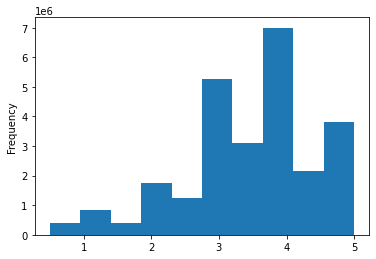

In [289]:
ratings['rating'].plot(kind='hist')